In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import cv2 as cv
import numpy as np

In [31]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [22]:
print(X_train[0][10][10])

[1]


In [5]:
m_tr = X_train.shape[0]
m_ts = X_test.shape[0]
width, height = X_train.shape[1:]
print(width, "x", height)

28 x 28


(28, 28, 1)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


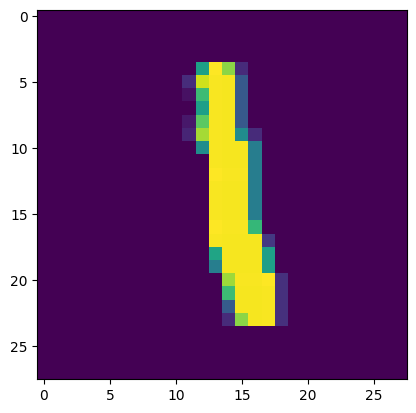

1/1 [==============================] - 0s 147ms/step


7

In [23]:
# sample from dataset
sample = 6
print(X_train[sample].shape)

print(Y_train[sample])
plt.imshow(X_train[sample])
plt.show()
# np.argmax(model.predict(X_train[sample].reshape(1, width, height)))

(28, 28)


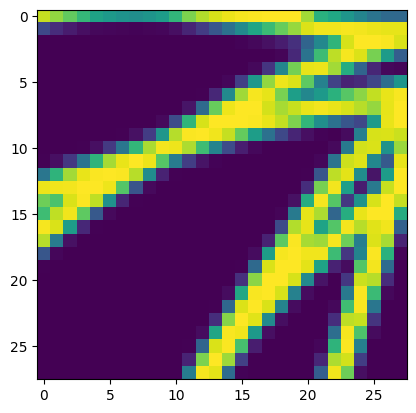

0.9137255

In [25]:
# just verifing with own samples

reduced_img = plt.imread('reduced.png')
print(reduced_img.shape)
plt.imshow(reduced_img)
plt.show()

In [27]:
# Creating a model in tensorflow

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation = 'relu'),

    layers.Dense(10, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               540900    
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 30)                1530      
                                                      

In [34]:

model.compile(
    
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Redloaded\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\metrics_utils.py", line 962, in sparse_categorical_matches  **
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [32,10].


In [27]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

model.save('digit_recognizer_2.h5')


313/313 - 0s - loss: 0.2036 - sparse_categorical_accuracy: 0.9627 - 363ms/epoch - 1ms/step


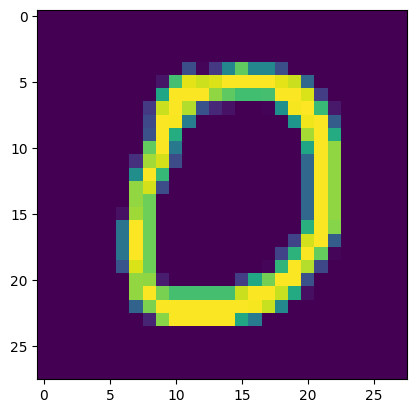

1/1 [==============================] - 0s 17ms/step
0


In [34]:


test_sample = 10
test_imag = X_test[test_sample]
plt.imshow(test_imag)

plt.show()
yhat = np.argmax(model.predict(test_imag.reshape(1, width, height)))
print(yhat)

1/1 [==============================] - 0s 19ms/step
2


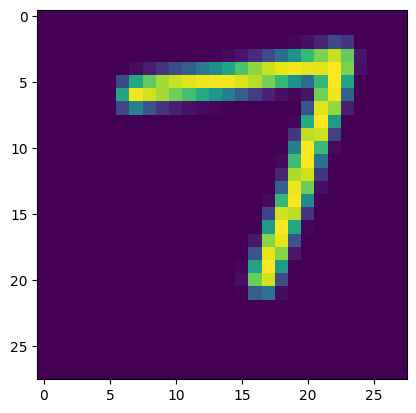

In [44]:
test_image = plt.imread('reduced.png')
yhat = model.predict(test_image.T.reshape(1, width, height))
plt.imshow(test_image)

print(np.argmax(yhat))